In [1]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np

plt.figure(figsize=(16,9))

%matplotlib inline

<Figure size 1600x900 with 0 Axes>

In [2]:
PROJECT_PATH = Path(os.path.dirname(os.path.dirname(os.path.abspath('movie-dataset (Gráficos)'))))
DADOS_PATH = PROJECT_PATH / 'dados' / 'saida' / 'movies.csv'

In [3]:
df = pd.read_csv(DADOS_PATH, parse_dates=['date'])
df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date,liquid
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000.0,46998772.0,Warner Bros.,146,1980-06-13,27998772.0
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104,1980-07-02,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124,1980-06-20,520375067.0
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88,1980-07-02,79953539.0
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98,1980-07-25,33846344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,O,R,Drama,6.1,19000.0,Tim Blake Nelson,William Shakespeare,Mekhi Phifer,United States,5000000.0,19260537.0,Chickie the Cop,95,2001-08-31,14260537.0
2541,Birthday Girl,R,Comedy,6.1,25000.0,Jez Butterworth,Tom Butterworth,Nicole Kidman,United States,13000000.0,16171098.0,FilmFour,93,2001-02-01,3171098.0
2542,Made,R,Comedy,6.4,18000.0,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000.0,5480653.0,Artisan Entertainment,95,2001-08-31,480653.0
2543,One Night at McCool's,R,Comedy,6.1,29000.0,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000.0,13578186.0,October Films,93,2001-04-27,-4421814.0


In [4]:
base = df.copy()

# Genre (Gênero)

In [5]:
sns.set_theme()

In [6]:
def agrupar_top_10(base: pd.DataFrame, col: str, ord_decres: bool=False) -> pd.DataFrame:
    return base.groupby(['genre'], as_index=False)[col].sum().sort_values(col, ascending=ord_decres).head(10)

In [7]:
def plot_bar(base: pd.DataFrame, x: str, y: str, label_position: str, ticks_position: str, errorbar: str=None) -> plt.Axes:
    fig = sns.barplot(
        data=base,
        x=x,
        y=y,
        errorbar=errorbar
    )
    if label_position is not None:
        fig.xaxis.set_label_position(label_position)
        fig.xaxis.set_ticks_position(ticks_position)
    return fig

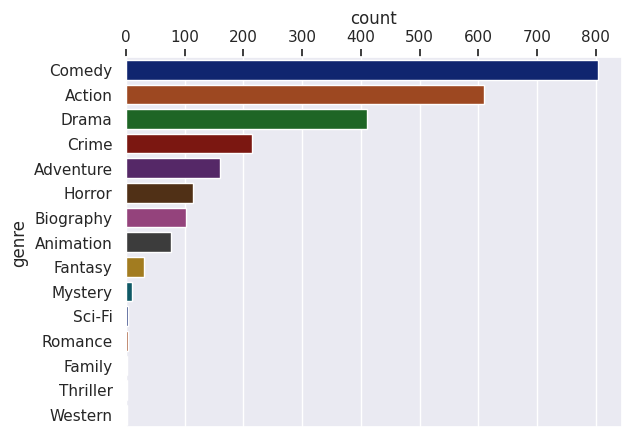

In [8]:
fig = sns.countplot(
    data=base,
    y='genre',
    order=base.value_counts(subset='genre').index,
    palette='dark'
)
fig.xaxis.set_label_position('top')
fig.xaxis.set_ticks_position('top')

---

## Quais os top 10 gêneros que deram mais lucro? E os que deram menos lucros?

In [9]:
base_top_10 = agrupar_top_10(base=base, ord_decres=False, col='liquid')
base_top_10

,genre,liquid
0,Action,3.186953e+10
4,Comedy,1.963539e+10
6,Drama,1.220106e+10
2,Animation,7.257478e+09
1,Adventure,5.499578e+09
5,Crime,3.772235e+09
3,Biography,2.167979e+09
9,Horror,2.003503e+09
7,Family,7.655305e+08
8,Fantasy,5.849068e+08


/tmp/ipykernel_3567/6774172.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


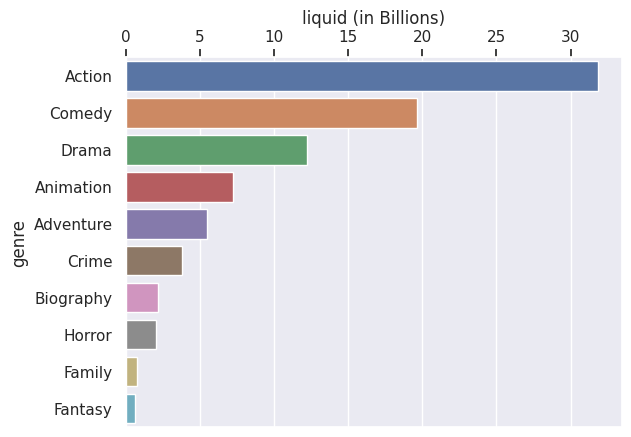

In [10]:
fig = sns.barplot(
    data=base_top_10,
    x='liquid',
    y='genre',
    errorbar=None
)
xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000000]
fig.set_xticklabels(xlabels)
fig.set(xlabel='liquid (in Billions)')
fig.xaxis.set_label_position('top')
fig.xaxis.set_ticks_position('top')

In [11]:
base_top_10 = agrupar_top_10(base=base, ord_decres=True, col='liquid')
base_top_10

,genre,liquid
12,Sci-Fi,-1.585940e+07
11,Romance,-1.079145e+07
14,Western,-9.741140e+05
13,Thriller,3.335054e+07
10,Mystery,3.380425e+08
8,Fantasy,5.849068e+08
7,Family,7.655305e+08
9,Horror,2.003503e+09
3,Biography,2.167979e+09
5,Crime,3.772235e+09


/tmp/ipykernel_3567/2848155183.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels);


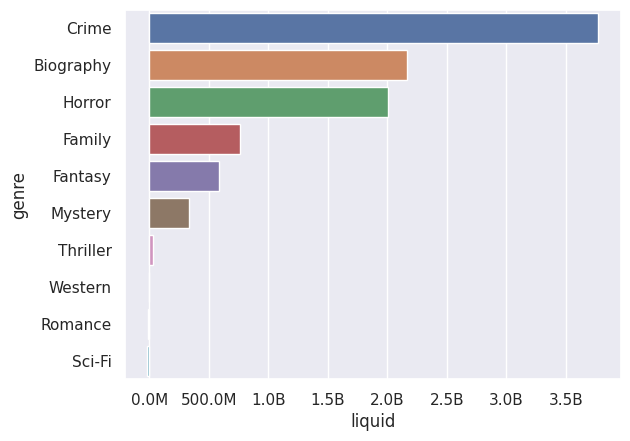

In [12]:
fig = sns.barplot(
    data=base_top_10.sort_values('liquid', ascending=False),
    x='liquid',
    y='genre'
)
xlabels = ['{:,.1f}M'.format(x) if x < 1000 else '{:,.1f}B'.format(x / 1000) for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels);

---

## Quais gêneros custam mais para serem produzidos?

In [13]:
base_top_10 = agrupar_top_10(base=base, ord_decres=False, col='budget')
base_top_10

,genre,budget
0,Action,2.051992e+10
4,Comedy,1.500240e+10
6,Drama,9.109848e+09
1,Adventure,4.395360e+09
5,Crime,4.338826e+09
2,Animation,3.364200e+09
3,Biography,2.416509e+09
9,Horror,1.306552e+09
8,Fantasy,5.477000e+08
10,Mystery,2.260000e+08


/tmp/ipykernel_3567/909633906.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


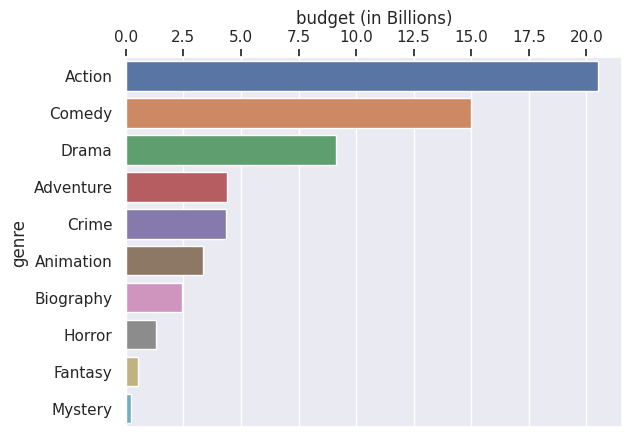

In [14]:
fig = plot_bar(base_top_10, y='genre', x='budget', label_position='top', ticks_position='top')
xlabels = ['{:,.1f}'.format(x) for x in fig.get_xticks() / 1000000000]
fig.set_xticklabels(xlabels)
fig.set(xlabel='budget (in Billions)');

---